In [151]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
data=pd.read_csv('salary prediction')

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [154]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [155]:
data.head(41)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


In [156]:
data.shape

(397, 6)

    Overview of data
Data has 397 rows and 6 columns
Rank - Categorical Variable - Depicts the rank of the employee
Discipline - Categorical Variable - Depicts the dsicipline of the employee
yrs.since.phd - Discrete Variable - Depicts the years since phd of the employee
yrs.service - Discrete Variable - Depicts the years of service of the employee
sex - Categorical Variable - Depicts the sex of the employee
salary - Outcome - Depicts the salary of the employee

Since we are predicting a continous variable this is a Regression problem

In [157]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Data has no null values

Exploratory Data Analysis
Striplots for categorical variables

In [158]:
Categorical_vars = ['rank', 'discipline', 'sex']
outcome_var = 'salary'

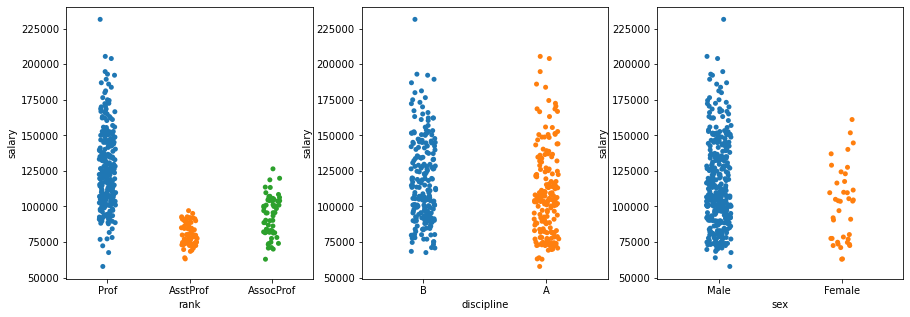

In [159]:
plt.figure(figsize=(15,5))
for i in range(len(Categorical_vars)):
    plt.subplot(1,3, i+1)
    sns.stripplot(x=data[Categorical_vars[i]], y=data[outcome_var])
    
plt.show()

From above stripplots we can concluse that -:

.Professors have highest Salaries, while AsstProf have lowest


.Salary in discipline A is a bioot more varied than in discipline B

.Male workers have higher salary than female workers, alos there are a lot more male workers than female workers

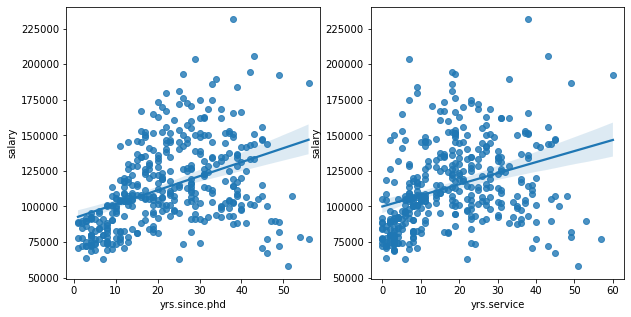

In [160]:
discrete_vars = ['yrs.since.phd','yrs.service']
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.regplot(x =data[discrete_vars[i]], y=data[outcome_var])
    
plt.show()

From Above scatterplots we can conclude that-:

.Years Since Phd has an upwards trend with Salary

.Years of Service has an upwards trend with Salary

.There Might be some outliers in the years since service column

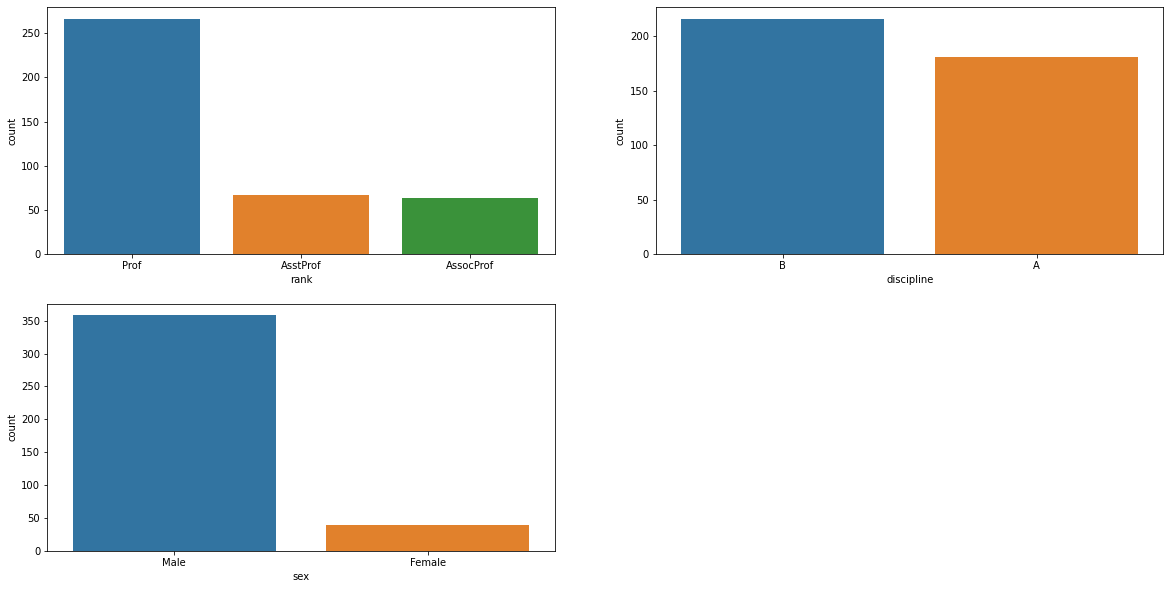

In [161]:
plt.figure(figsize=(20,10))
plotnumber = 1
for col in Categorical_vars:
    plt.subplot(2,2,plotnumber)
    sns.countplot(data[col])
    plotnumber+=1

From above count plots we can see that there are most number of proessors in the rank column, while the number of AssocProf are lowest. Discipline B has more values than discipline A. The number of Male worksers are fairly more than the number of feamle workers.

In [162]:
ranklist = ['Prof', 'AsstProf', 'AssocProf']
disciplinelist = ['A', 'B']
sex_list = ['Male', 'Female']

In [163]:
mean_ranks = []
for var in ranklist:
    meanSeriesRank = [data.iloc[i, 5] for i in range(len(data)) if data.iloc[i, 0] == var]
    meanSeriesRank = pd.Series(meanSeriesRank)
    mean_ranks.append(meanSeriesRank.mean())
    
meanRankDataFrame = pd.DataFrame({'Rank':ranklist, 'Mean':mean_ranks})
meanRankDataFrame = meanRankDataFrame.nlargest(3, 'Mean')
meanRankDataFrame

,Rank,Mean
0,Prof,126772.109023
2,AssocProf,93876.437500
1,AsstProf,80775.985075


<AxesSubplot:xlabel='Rank', ylabel='Mean'>

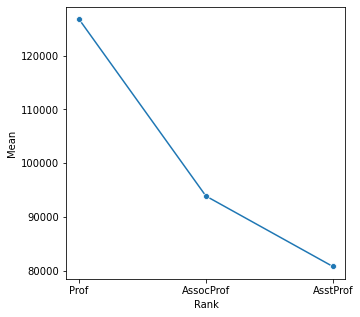

In [164]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Rank', y='Mean', data=meanRankDataFrame,marker='o')

In [165]:
mean_sex = []
for var in sex_list:
    meanSexSeries = [data.iloc[i, 5] for i in range(len(data)) if data.iloc[i, 4] == var]
    meanSexSeries = pd.Series(meanSexSeries)
    mean_sex.append(meanSexSeries.mean())
    
meanSexDataFrame = pd.DataFrame({'Sex':sex_list, 'Mean':mean_sex})
meanSexDataFrame = meanSexDataFrame.nlargest(3, 'Mean')
meanSexDataFrame

,Sex,Mean
0,Male,115090.418994
1,Female,101002.410256


<AxesSubplot:xlabel='Sex', ylabel='Mean'>

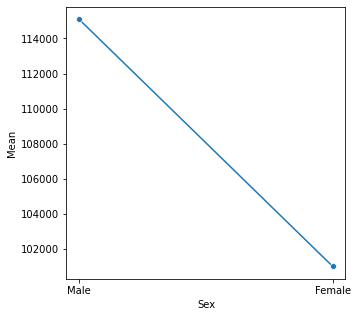

In [166]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Sex', y='Mean', data=meanSexDataFrame,marker='o')

In [167]:
mean_dis = []
for var in disciplinelist:
    meanDisSeries = [data.iloc[i, 5] for i in range(len(data)) if data.iloc[i, 1] == var]
    meanDisSeries = pd.Series(meanDisSeries)
    mean_dis.append(meanDisSeries.mean())
    
meanDisDataFrame = pd.DataFrame({'Discipline':disciplinelist, 'Mean':mean_dis})
meanDisDataFrame = meanDisDataFrame.nlargest(3, 'Mean')
meanDisDataFrame

,Discipline,Mean
1,B,118028.694444
0,A,108548.430939


<AxesSubplot:xlabel='Discipline', ylabel='Mean'>

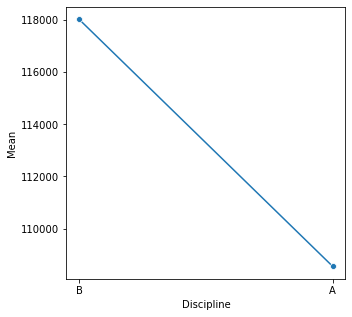

In [168]:
plt.figure(figsize=(5,5))
sns.lineplot(x='Discipline', y='Mean', data=meanDisDataFrame,marker='o')

<Figure size 2160x720 with 0 Axes>

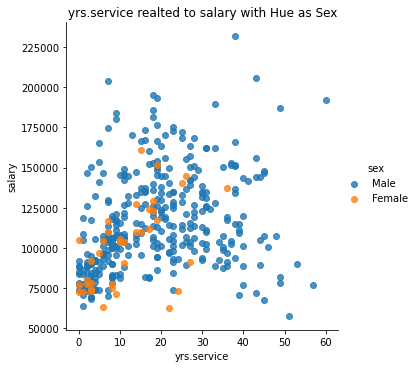

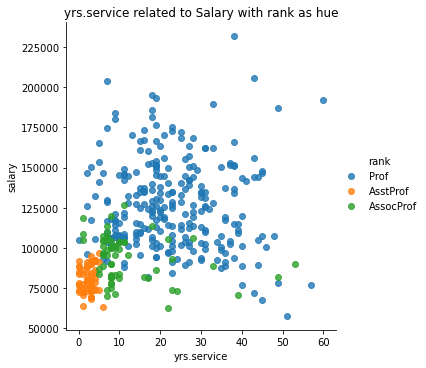

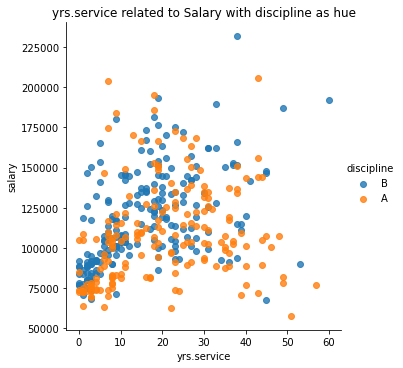

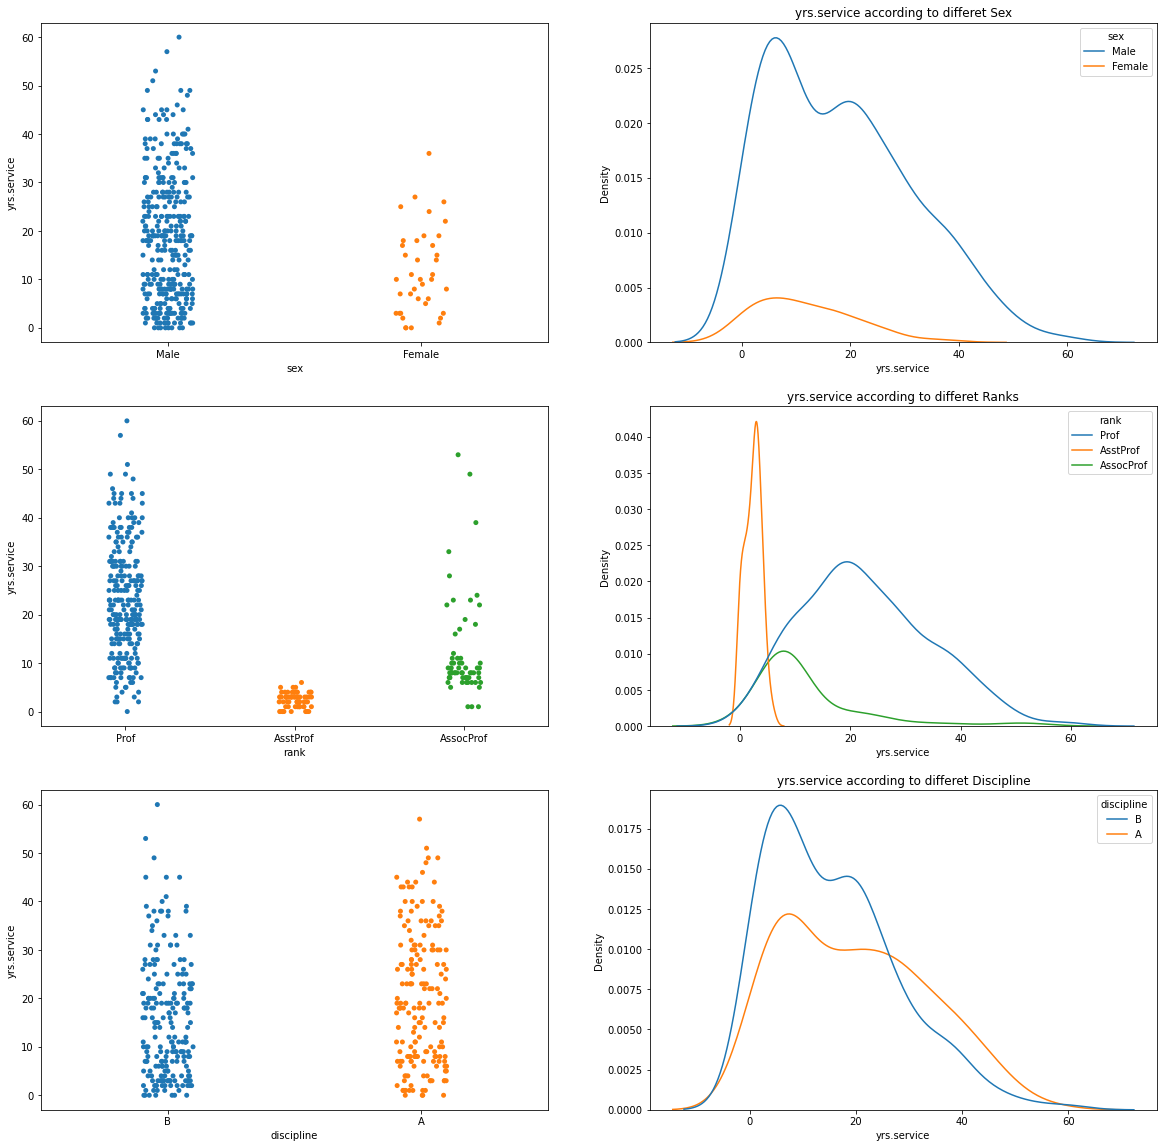

<Figure size 2160x720 with 0 Axes>

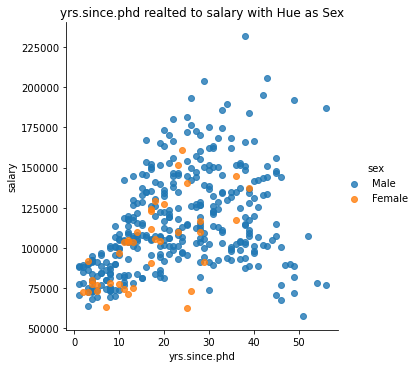

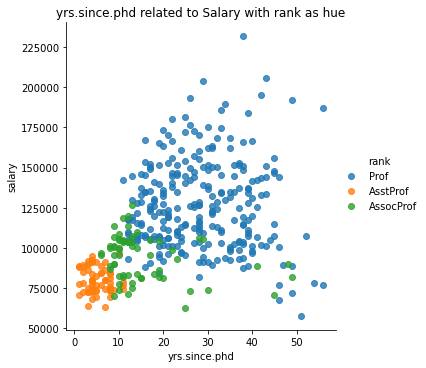

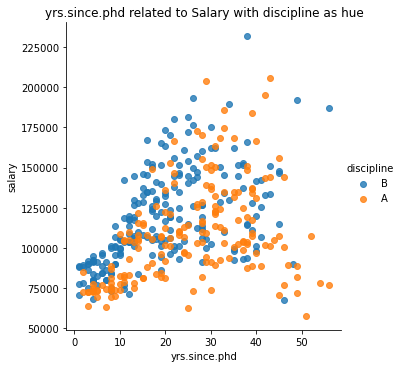

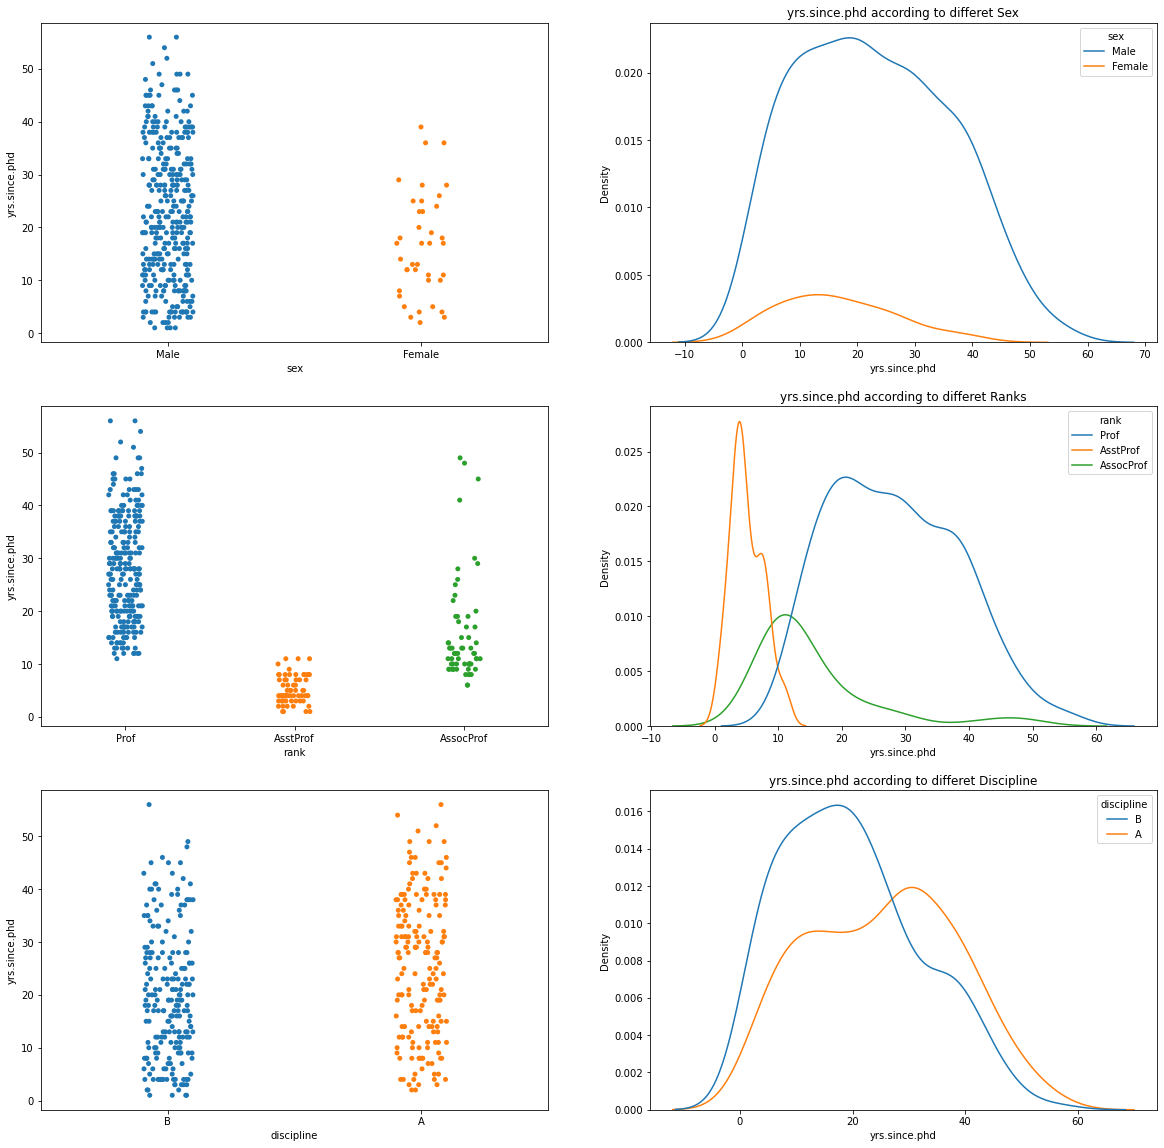

In [169]:
for i,col in enumerate(['yrs.service', 'yrs.since.phd']):
    plt.figure(figsize=(30,10))
    sns.lmplot(y='salary', x=col,data=data, hue='sex',fit_reg=False)
    plt.title(f'{col} realted to salary with Hue as Sex')
    sns.lmplot(y='salary', x=col, data=data, hue='rank', fit_reg=False)
    plt.title(f'{col} related to Salary with rank as hue')
    sns.lmplot(y='salary', x=col, data=data, hue='discipline', fit_reg=False)
    plt.title(f'{col} related to Salary with discipline as hue')
    plt.figure(figsize=(20,20))
    plt.subplot(3,2,1)
    sns.stripplot(y=col, x='sex', data=data)
    plt.subplot(3,2,2)
    sns.kdeplot(x=col, hue='sex', data=data)
    plt.title(f'{col} according to differet Sex')
    plt.subplot(3,2,3)
    sns.stripplot(y=col, x='rank', data=data)
    plt.subplot(3,2,4)
    sns.kdeplot(x=col, hue='rank', data=data)
    plt.title(f'{col} according to differet Ranks')
    plt.subplot(3,2,5)
    sns.stripplot(y=col, x='discipline', data=data)
    plt.subplot(3,2,6)
    sns.kdeplot(x=col, hue='discipline', data=data)
    plt.title(f'{col} according to differet Discipline')

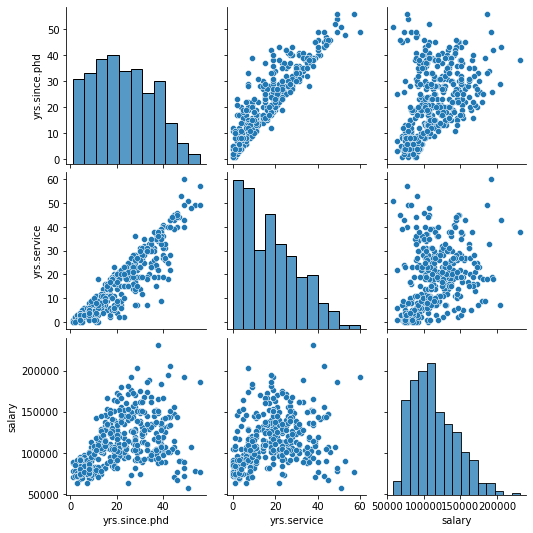

In [170]:
sns.pairplot(data)
plt.savefig('pairplot.png')
plt.show()

We can see that yrs.service and yrs.since.phd have high correlaion with each other. This will be handled later using VIF for mulitcollinearity

Correlation Matrix

In [171]:
data.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


Correlation Heatmap

<AxesSubplot:>

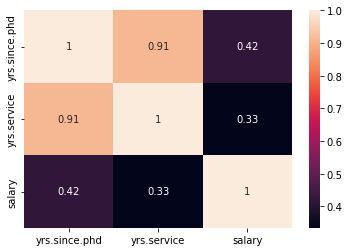

In [172]:
sns.heatmap(data.corr(), annot=True)

Descriptive Statistics

In [173]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<AxesSubplot:>

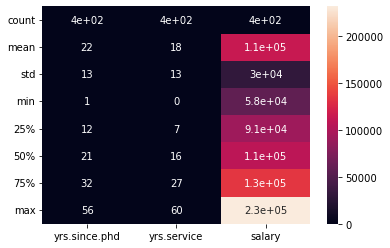

In [174]:
sns.heatmap(data.describe(), annot=True)

# Outcome of descriptive Statistice

Years Since Phd.

Mean - 22.31
STD - 12.88
Min - 1.00
Max - 56.00
Years of Service.
Mean - 17.61
STD - 13.00
Min - 0.00
Max - 60.00
Salary.
Mean - 113706
STD - 30289
Min - 57800
Max - 231545

Looking for outliers using boxplot

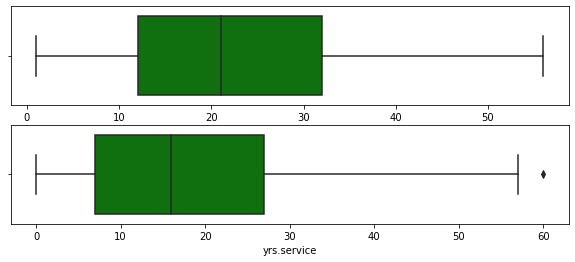

In [175]:
plt.figure(figsize=(10,4))
for i, col in enumerate(discrete_vars):
    plt.subplot(2,1, i+1)
    sns.boxplot(data[col], color='green',orient='v')
    
plt.show()

Our data is fairly clean expect one outlier in yrs.service

In [176]:
data.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Yrs.service Column is lightly skewed

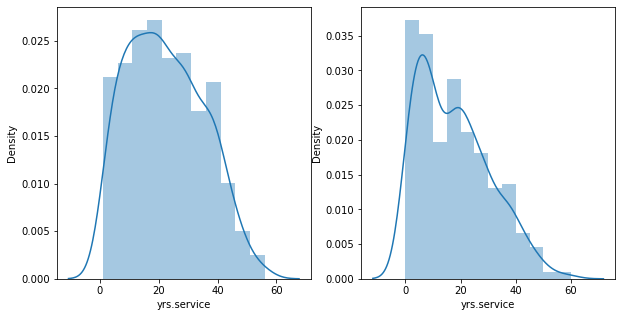

In [177]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =data[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

Above plots confirm our intiution about skew of yrs.service colu

In [178]:
to_apply_z_df = data.drop(columns=["salary"])

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,19,18,Male
1,Prof,B,20,16,Male
2,AsstProf,B,4,3,Male
3,Prof,B,45,39,Male
4,Prof,B,40,41,Male
...,...,...,...,...,...
392,Prof,A,33,30,Male
393,Prof,A,31,19,Male
394,Prof,A,42,25,Male
395,Prof,A,25,15,Male


In [179]:
from scipy.stats import zscore
z = np.abs(zscore(to_apply_z_df.iloc[:, 2:4]))
z.shape

(397, 2)

In [180]:
data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])
data_new.isnull().sum()

Old Shape (397, 6)
New Shape (395, 6)
Total Dropped Rows 2


rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Trying to remove skewness using log transformation

In [181]:
x = data_new.drop(columns=['salary'])
y = data_new['salary']
print(x.shape)
print(x.mean())
print(x.isnull().sum())

(395, 5)
yrs.since.phd    22.162025
yrs.service      17.407595
dtype: float64
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
dtype: int64


In [182]:
x_logged = pd.DataFrame()
x_logged['yrs.service'] = np.log1p(x['yrs.service'])
x_logged['yrs.since.phd'] = np.log1p(x['yrs.since.phd'])
x_logged.skew()

yrs.service     -0.837925
yrs.since.phd   -0.911403
dtype: float64

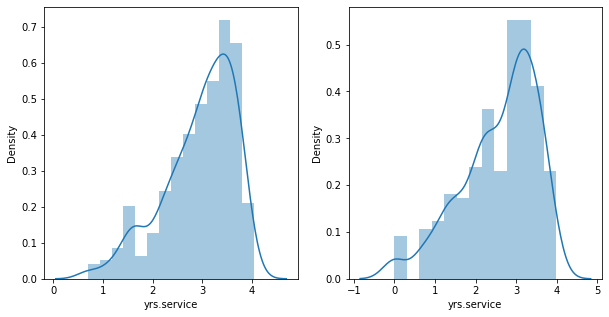

In [183]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x_logged[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

Log Transformation does not help in removing skew

In [184]:
x_sqrt = pd.DataFrame()
x_sqrt['yrs.service'] = np.sqrt(x['yrs.service'])
x_sqrt['yrs.since.phd'] = np.sqrt(x['yrs.since.phd'])
x_sqrt.skew()

yrs.service     -0.191086
yrs.since.phd   -0.293387
dtype: float64

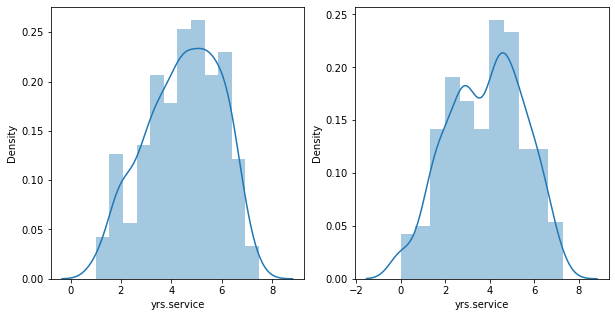

In [185]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x_sqrt[discrete_vars[i]])
    plt.xlabel(col)

Yeo-Johnson Transformation has done the best in removing skew

Applying yeo-johnson as final transformation

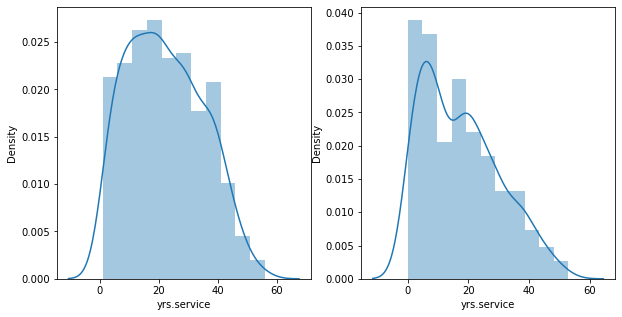

In [199]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

Scaling the data Using Standard scaler

In [200]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x['yrs.service'] = sc.fit_transform(np.array(x.iloc[:,3]).reshape(-1,1))
x['yrs.since.phd'] = sc.transform(np.array(x.iloc[:,2]).reshape(-1,1))
x.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
dtype: int64

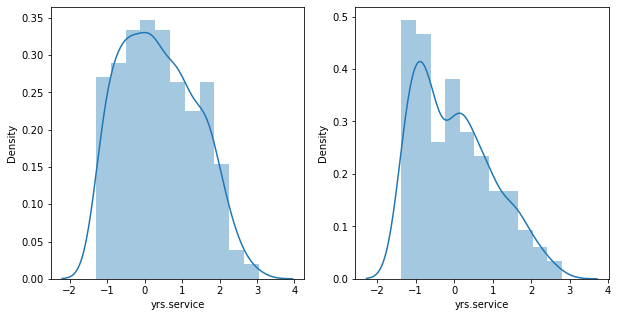

In [201]:
plt.figure(figsize=(10,5))
for i in range(len(discrete_vars)):
    plt.subplot(1,2,i+1)
    sns.distplot(x =x[discrete_vars[i]])
    plt.xlabel(col)
    
plt.show()

In [202]:
x.mean()

yrs.since.phd    3.746239e-01
yrs.service     -1.382860e-16
dtype: float64

Data now follows a close to normal distribution, with mean around zero

Encoding categorical variables using get_dummies

In [203]:
x = pd.get_dummies(x)
x

,yrs.since.phd,yrs.service,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,0.125473,0.046678,0,0,1,0,1,0,1
1,0.204268,-0.110911,0,0,1,0,1,0,1
2,-1.056447,-1.135242,0,1,0,0,1,0,1
3,2.174135,1.701367,0,0,1,0,1,0,1
4,1.780162,1.858957,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
392,1.228599,0.992215,0,0,1,1,0,0,1
393,1.071010,0.125473,0,0,1,1,0,0,1
394,1.937751,0.598241,0,0,1,1,0,0,1
395,0.598241,-0.189706,0,0,1,1,0,0,1


Checking for multicollinearity using VI

In [204]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,7.342149,yrs.since.phd
1,5.804955,yrs.service
2,inf,rank_AssocProf
3,inf,rank_AsstProf
4,inf,rank_Prof
5,inf,discipline_A
6,inf,discipline_B
7,inf,sex_Female
8,inf,sex_Male


Yrs since phd has highest VIF we can drop this column

In [205]:
x = x.drop(columns=['yrs.since.phd'])

In [206]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.647394,yrs.service
1,inf,rank_AssocProf
2,inf,rank_AsstProf
3,inf,rank_Prof
4,inf,discipline_A
5,inf,discipline_B
6,inf,sex_Female
7,inf,sex_Male


Linear Regression Model

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [208]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=70)

In [209]:
lr = LinearRegression()
params = {'fit_intercept':[True, False],
          'normalize':[True, False],
          'positive':[True, False],
         }
grid = GridSearchCV(estimator = lr, param_grid=params, scoring='r2', n_jobs=-1,return_train_score=True, cv=None)

grid.fit(X_train, Y_train)
print("Best Params : " ,grid.best_params_)
print("Best Score : ", grid.best_score_)

Best Params :  {'fit_intercept': True, 'normalize': True, 'positive': True}
Best Score :  0.3927078953190532


In [210]:
lr_optimal = LinearRegression(fit_intercept=False, normalize=True, positive=True)
lr_optimal.fit(X_train, Y_train)
y_pred_train = lr_optimal.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = lr_optimal.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.34327089166254643
Training Mean Absolute Error : 16710.203123783922
Training Mean Squared Error : 522056791.4309794
Training Root Mean Squared Error:  22848.562130492573
Testing R2 Score : 0.005442021212590409
Testing Mean Absolute Error : 15840.31864247001
Testing Mean Squared Error : 405047163.4408759
Testing Root Mean Squared Error:  20125.783548495096


This model performs very poorly

<AxesSubplot:xlabel='salary'>

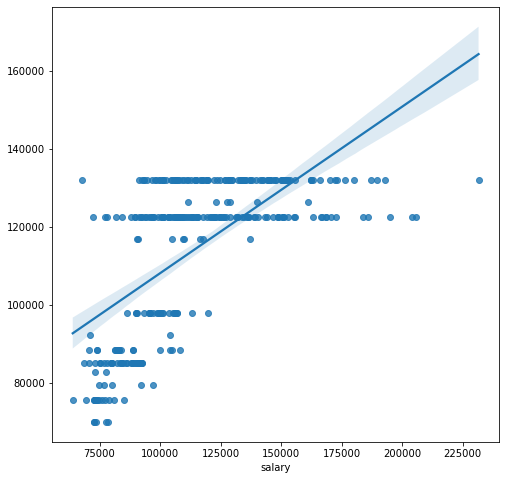

In [211]:
plt.figure(figsize=(8,8))
sns.regplot(Y_train, y_pred_train)

<AxesSubplot:xlabel='salary'>

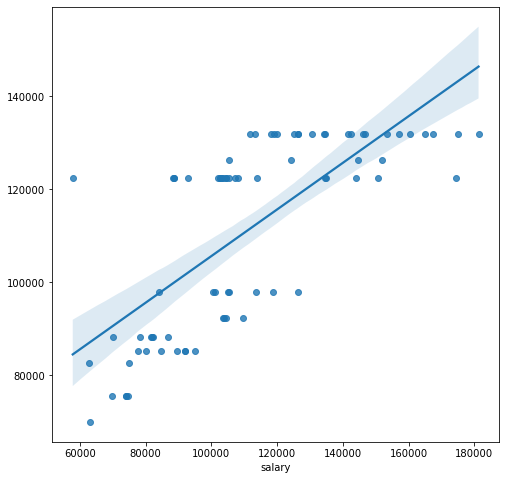

In [212]:
plt.figure(figsize=(8,8))

sns.regplot(Y_test, y_pred_test)

Lasso Reg Model

In [213]:
from sklearn.linear_model import Lasso

In [214]:
lass = Lasso()

In [215]:
params_lasso = {'alpha':np.arange(40,60,2),
          'fit_intercept':[True, False],
          'normalize':[True, False],
          'max_iter':np.arange(1000,10000, 1000),
          'precompute':[True, False],
#           'warm_start':[True, False],
#           'positive':[True, False],
#           'tol':np.arange(0.000001, 0.1, 0.00001),
          'selection':['random', 'cyclic']
         }
grid_lass = GridSearchCV(estimator=lass, param_grid=params_lasso, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_lass.fit(X_train, Y_train)
print("Best Params : " ,grid_lass.best_params_)
print("Best Score : ", grid_lass.best_score_)

Best Params :  {'alpha': 58, 'fit_intercept': True, 'max_iter': 6000, 'normalize': True, 'precompute': False, 'selection': 'random'}
Best Score :  0.39118673286377803


Builind model with best params

In [216]:
lass_optimal=Lasso(alpha=48, fit_intercept=True, max_iter=4000, normalize=True, precompute=True, selection='random')
lass_optimal.fit(X_train, Y_train)
y_pred_train = lass_optimal.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = lass_optimal.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.5203587806245518
Training Mean Absolute Error : 16835.940867856774
Training Mean Squared Error : 524305761.52373785
Training Root Mean Squared Error:  22897.723937626157
Testing R2 Score : -0.16429062968475727
Testing Mean Absolute Error : 16293.91458818162
Testing Mean Squared Error : 420488857.2743104
Testing Root Mean Squared Error:  20505.824959613557


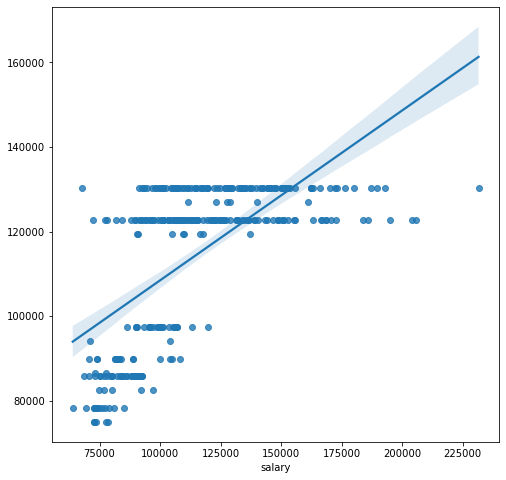

In [217]:
plt.figure(figsize=(8,8))
ax =sns.regplot(Y_train, y_pred_train)

<AxesSubplot:xlabel='salary'>

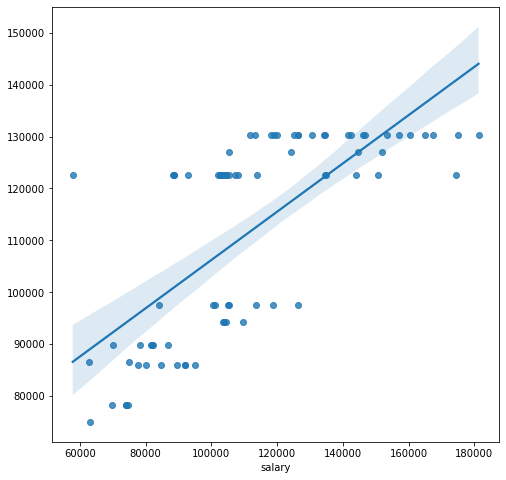

In [218]:
plt.figure(figsize=(8,8))
sns.regplot(Y_test, y_pred_test)

Rideg Reg Model

In [219]:
from sklearn.linear_model import Ridge

In [220]:
ridge = Ridge()
params_ridge= {
    'alpha':np.arange(1e-03, 0.1, 3e-02),
    'fit_intercept':[True, False],
    'normalize':[True, False],
    'max_iter':np.arange(1000,10000, 1000),
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}
grid_ridge = GridSearchCV(estimator=ridge, param_grid=params_ridge, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_ridge.fit(X_train, Y_train)
print("Best Params : " ,grid_ridge.best_params_)
print("Best Score : ", grid_ridge.best_score_)

Best Params :  {'alpha': 0.061, 'fit_intercept': True, 'max_iter': 3000, 'normalize': True, 'solver': 'saga'}
Best Score :  0.38564281949233337


In [221]:
ridge = Ridge(alpha = .031, fit_intercept=True, max_iter=3000, normalize=True, solver='sag')
ridge.fit(X_train, Y_train)
y_pred_train = ridge.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = ridge.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.3916309854956901
Training Mean Absolute Error : 16717.833113361416
Training Mean Squared Error : 522069802.0070167
Training Root Mean Squared Error:  22848.846841952807
Testing R2 Score : -0.029524003856163494
Testing Mean Absolute Error : 15894.973523588438
Testing Mean Squared Error : 405279625.150886
Testing Root Mean Squared Error:  20131.557941473035


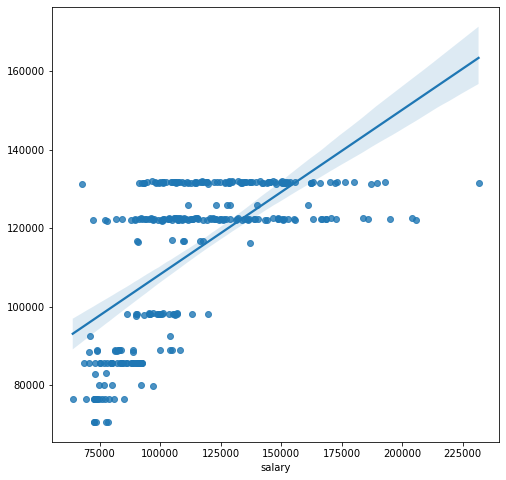

In [222]:
plt.figure(figsize=(8,8))
ax =sns.regplot(Y_train, y_pred_train)

<AxesSubplot:xlabel='salary'>

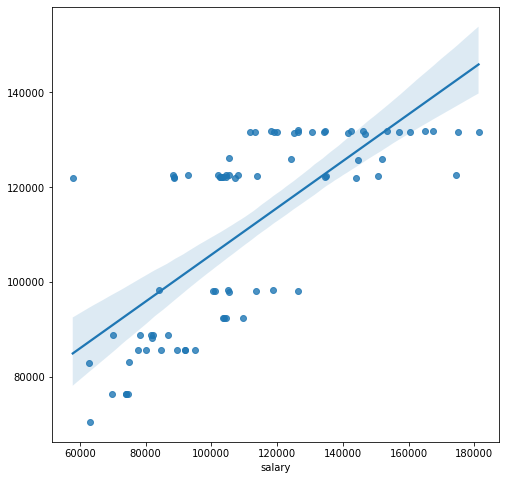

In [223]:
plt.figure(figsize=(8,8))
sns.regplot(Y_test, y_pred_test)

This model does jsut a little better than other two models

# KNeighbors REgressor Model


In [224]:
from sklearn.neighbors import KNeighborsRegressor

In [225]:
knn = KNeighborsRegressor()
params_knn = {
    'n_neighbors' : [12,13,14,15,16],
    'weights':['uniform', 'distance'],
    'p':[1,2],
    'leaf_size':[2,3],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs':[-1]
}
grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_knn.fit(X_train, Y_train)
print("Best Params : " ,grid_knn.best_params_)
print("Best Score : ", grid_knn.best_score_)

Best Params :  {'algorithm': 'brute', 'leaf_size': 2, 'n_jobs': -1, 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}
Best Score :  0.32714498194580244


In [226]:
knn = KNeighborsRegressor(algorithm='brute', leaf_size=2, n_jobs=-1, n_neighbors=13, p=1, weights='uniform')
knn.fit(X_train,Y_train)
y_pred_train = knn.predict(X_train)
print("Training R2 Score :", r2_score(y_pred_train, Y_train))
print("Training Mean Absolute Error :", mean_absolute_error(y_pred_train, Y_train))
print("Training Mean Squared Error :", mean_squared_error(y_pred_train, Y_train))
print("Training Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_train, Y_train)))

y_pred_test = knn.predict(X_test)
print("Testing R2 Score :", r2_score(y_pred_test, Y_test))
print("Testing Mean Absolute Error :", mean_absolute_error(y_pred_test, Y_test))
print("Testing Mean Squared Error :", mean_squared_error(y_pred_test, Y_test))
print("Testing Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred_test, Y_test)))

Training R2 Score : -0.24492472299054713
Training Mean Absolute Error : 16637.00973709835
Training Mean Squared Error : 512183066.7471725
Training Root Mean Squared Error:  22631.461878260812
Testing R2 Score : 0.016061073903334666
Testing Mean Absolute Error : 15370.228821811099
Testing Mean Squared Error : 388108802.741892
Testing Root Mean Squared Error:  19700.477221171368


<AxesSubplot:xlabel='salary'>

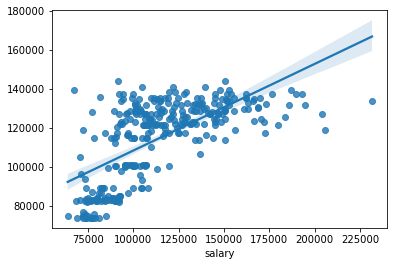

In [227]:
sns.regplot(Y_train, y_pred_train)

<AxesSubplot:xlabel='salary'>

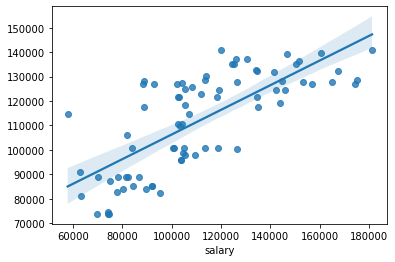

In [228]:
sns.regplot(Y_test, y_pred_test)

# SVM Regressor

In [229]:
from sklearn.svm import SVR

In [ ]:
svr=SVR()
param_svr = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'degree':[1,2],
    'gamma':['scale', 'auto'],
    'coef0':[-2,-3,-4,-1],
    'C':np.arange(7000,10000,200),
    'shrinking':[True, False],
    'epsilon':[1e-12, 1e-10,1e-11],
    'max_iter':[2000,3000,4000]
}
grid_svr = GridSearchCV(estimator=svr, param_grid=param_svr, scoring='r2', n_jobs=-1, return_train_score=True, cv=None)
grid_svr.fit(X_train, Y_train)
print("Best Params : " ,grid_svr.best_params_)
print("Best Score : ", grid_svr.best_score_)

In [ ]:
svr = SVR(C=7200, coef0=-2, degree=1, epsilon=1e-12, gamma='scale', kernel='linear', max_iter=2000, shrinking=False)
svr.fit(X_train, Y_train)
y_pred_train = svr.predict(X_train)
print("Training Score:", r2_score(Y_train, y_pred_train))
print("Training MEan Squared Error:", mean_squared_error(Y_train, y_pred_train))
print("Training Mean Absolute Error:", mean_absolute_error(Y_train, y_pred_train))
print("Trainig Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_train, y_pred_train)))

y_pred_test = svr.predict(X_test)
print("Testing Score:", r2_score(Y_test, y_pred_test))
print("Testing MEan Squared Error:", mean_squared_error(Y_test, y_pred_test))
print("Testing Mean Absolute Error:", mean_absolute_error(Y_test, y_pred_test))
print("Testing Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, y_pred_test)))

In [ ]:
sns.regplot(Y_train,y_pred_train)

In [ ]:
sns.regplot(Y_test, y_pred_test)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()
params_xgb = {
    'n_estimators':[12,13,14,15,16,17],
    'learning_rate':np.arange(0.0001, 1.0, 0.05),
    'booster':['gbtree', 'gblinear', 'dart'],
    'n_jobs':[-1]
}
grid_kgb = GridSearchCV(estimator=xgb, param_grid=params_xgb, n_jobs=-1, cv=3, scoring='r2')
grid_kgb.fit(X_train, Y_train)
print("Best Params : " ,grid_kgb.best_params_)
print("Best Score : ", grid_kgb.best_score_)

In [ ]:
xgb = XGBRegressor(booster='gblinear', learning_rate=0.6, n_estimators=15, n_jobs=-1)
xgb.fit(X_train, Y_train)
y_pred_train = xgb.predict(X_train)
print("Training Score:", r2_score(Y_train, y_pred_train))
print("Training MEan Squared Error:", mean_squared_error(Y_train, y_pred_train))
print("Training Mean Absolute Error:", mean_absolute_error(Y_train, y_pred_train))
print("Trainig Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_train, y_pred_train)))

y_pred_test = xgb.predict(X_test)
print("Testing Score:", r2_score(Y_test, y_pred_test))
print("Testing MEan Squared Error:", mean_squared_error(Y_test, y_pred_test))
print("Testing Mean Absolute Error:", mean_absolute_error(Y_test, y_pred_test))
print("Testing Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, y_pred_test)))

In [ ]:
sns.regplot(Y_train,y_pred_train)

In [ ]:
sns.regplot(Y_test, y_pred_test)

SVR Model is the best performimg mode